**Import Dependencies**

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [44]:
df= pd.read_csv('https://github.com/codebasics/py/raw/801ee0ee4d342fd22b89915dc0c4864250a0ec10/ML/13_kmeans/income.csv#L4')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


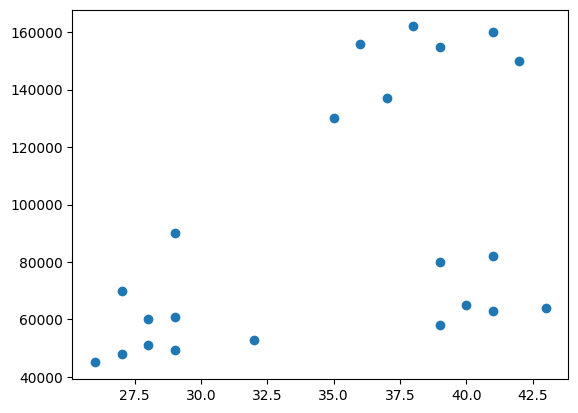

In [45]:
plt.scatter(df['Age'], df['Income($)'])
plt.show()

In [46]:
km= KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [47]:
import warnings
warnings.filterwarnings("ignore")

In [48]:
y_pred= km.fit_predict(df[['Age', 'Income($)']])
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [49]:
df['cluster']= y_pred
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


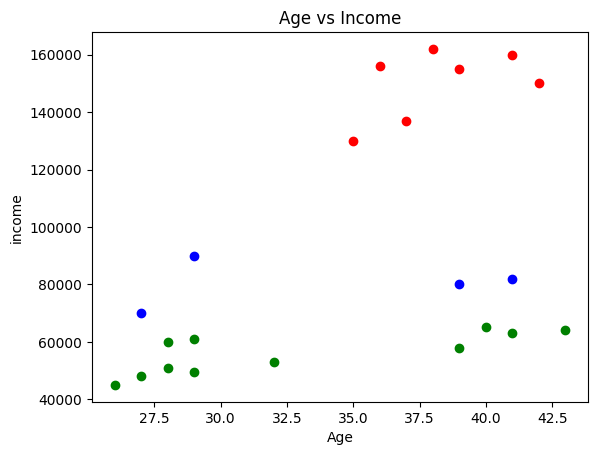

In [50]:
# Seperate these clusters

df1= df[df.cluster==0]
df2= df[df.cluster==1]
df3= df[df.cluster==2]

plt.scatter(df1.Age, df1['Income($)'], color='g')
plt.scatter(df2.Age, df2['Income($)'], color='r')
plt.scatter(df3.Age, df3['Income($)'], color='b')

plt.xlabel('Age')
plt.ylabel('income')
plt.title('Age vs Income')
plt.show()

In [51]:
# Scaling is not right, hence scatter is problamatic

In [52]:
scaler= MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)']= scaler.transform(df[['Income($)']])


scaler.fit(df[['Age']])
df['Age']= scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


**K Means**

In [53]:
km= KMeans(n_clusters=3)
y_pred= km.fit_predict(df[['Age', 'Income($)']])
y_pred

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [55]:
df['cluster']= y_pred
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


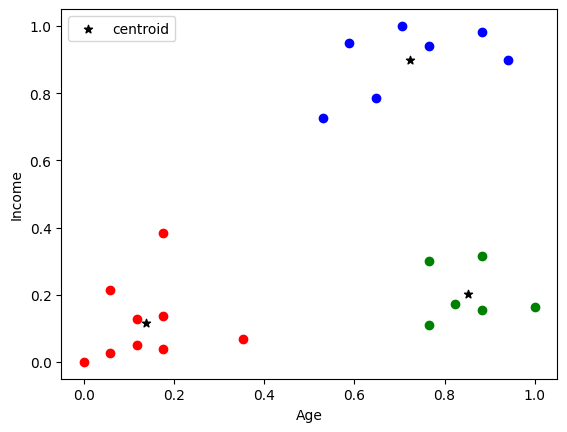

In [57]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='g')
plt.scatter(df2.Age,df2['Income($)'],color='r')
plt.scatter(df3.Age,df3['Income($)'],color='b')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

**Elbow Point**

In [61]:
sse = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)


In [64]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3625079900797329,
 0.2755825568722976,
 0.2187801089333045,
 0.17840674931327935,
 0.13265419827245162,
 0.10919063774844096]

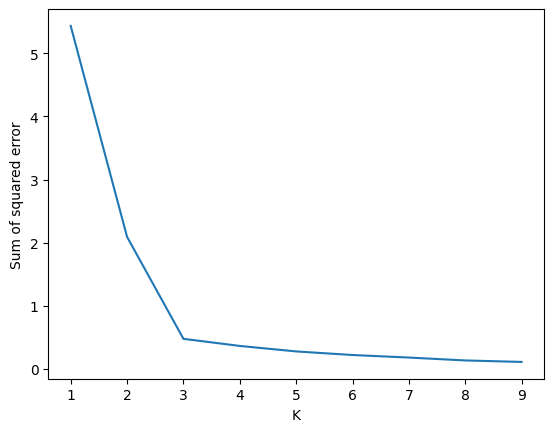

In [63]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)
plt.show()